In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from modules.loader import ImmothepDataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

loader = ImmothepDataLoader()

DATASET_PATH = '../datas/CURATED/'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
loader.ensure_data_loaded()

Les fichiers sont correctement téléchargés


In [17]:
extrait_df_valeurs_foncieres = pd.read_csv(DATASET_PATH + "maison_filtre.csv", sep=',', usecols=['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Code postal'], encoding='utf-8')

In [18]:
data = extrait_df_valeurs_foncieres.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2)
SGD = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15)
improvements = list()
for z in range(1000):
    SGD.partial_fit(X_train, y_train)
    improvements.append(mean_squared_error(y_test, SGD.predict(X_test)))

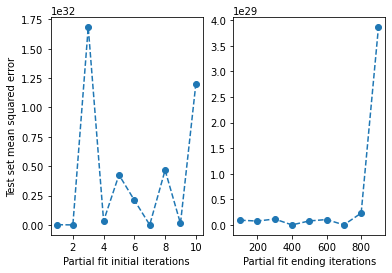

In [20]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(range(1,11),np.abs(improvements[:10]),'o--')
plt.xlabel('Partial fit initial iterations')
plt.ylabel('Test set mean squared error')
plt.subplot(1,2,2)
plt.plot(range(100,1000,100),np.abs(improvements[100:1000:100]),'o--')
plt.xlabel('Partial fit ending iterations’)
plt.show()

In [22]:
data = extrait_df_valeurs_foncieres.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
estimator = SGDRegressor()
# estimator = LinearRegression()  # LinearRegression works with sparse matrix
estimator.fit(X_train, y_train)
predicted = estimator.predict(X_train)

In [27]:

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

SyntaxError: invalid syntax (&lt;ipython-input-27-7750083256d7&gt;, line 2)

In [35]:
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.0034404090727345737
